## Persian Twitter Dataset
About Dataset

This dataset contains more than 3300 Persian tweets, crawled from Twitter.com
Each tweet is assigned a label, which is a number between 0 to 4.
Label 0 indicates the sentiment of Happiness and Joy.
Label 1 indicates the sentiment of Sadness.
Label 2 indicates the sentiment of Anger and Furiosity.
Label 3 indicates the sentiment of Neutral.
And finally, label 4 indicates the sentiment of intense emotions, such as Surprise, Fear, and Love.

In [2]:
import pandas as pd

df2= pd.read_csv('./PersianTwitterDataset.csv')
df2.Label.value_counts()

Label
Sad                 1120
Happy               1057
Intense Emotions     415
Neutral              401
Angry                388
Name: count, dtype: int64

In [3]:
import random
i= random.randint(0, 3300)
# print(df2.loc[i, 'Tweets'])
# print(df2.loc[i, 'Label'])

## Persian tweets emotional dataset
About Dataset
New Persian Dataset
Since Persian datasets are really scarce I scrape Twitter in order to make a new Persian dataset.

The tweets have been pulled from Twitter using snscrape and manual tagging has been done based on Ekman's 6 main emotions.
For privacy sake, I pre-process and remove usernames, display names, and mentions from all tweets. Also, I deleted the timestamps and Tweets IDs.

Columns:
1) tweet
2) replyCount
3) retweetCount
4) likeCount
5) quoteCount
6) hashtags
7) sourceLabel
8) emotion

Please leave an upvote if you find this relevant. :)

In [4]:
df= pd.read_csv('./merged.csv')
df.emotion.value_counts()

emotion
sad         34328
joy         28024
anger       20069
fear        17624
surprise    12859
disgust       925
Name: count, dtype: int64

In [5]:
df3 = pd.read_excel('./train_fa.xlsx')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    6151 non-null   object
 1   emotion  6154 non-null   object
dtypes: object(2)
memory usage: 96.3+ KB


In [6]:
df3.isna().sum()

tweet      5
emotion    2
dtype: int64

In [7]:
import re
# drop the rows tha have nan values
df3= df3.dropna()
print(df3.isna().sum())

# drop the duplicated values
df3= df3.drop_duplicates()
print(df3.duplicated().sum())
df3



tweet      0
emotion    0
dtype: int64
0


,tweet,emotion
0,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
1,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
2,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
3,اين وضع ب طرز خنده داري گريه داره ...,SAD
4,خب من رسما از یک نفر متنفرم،چون از گربه بدش می...,HATE
...,...,...
6151,مرحوم پیش بینی آبکی زیاد میکرد مرحوم عجب آ...,SURPRISE
6152,کلا عین اعتقادات و توئیت زدناتون ... !! در ق...,ANGRY
6153,خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...,FEAR
6154,همون هارو مگه آهنگ جدیدای خواننده‌های دهه ...,SURPRISE


emotion
OTHER       27.405105
ANGRY       15.019634
SAD         14.725131
FEAR        12.238220
SURPRISE    12.009162
HAPPY       10.176702
HATE         8.426047
Name: proportion, dtype: float64


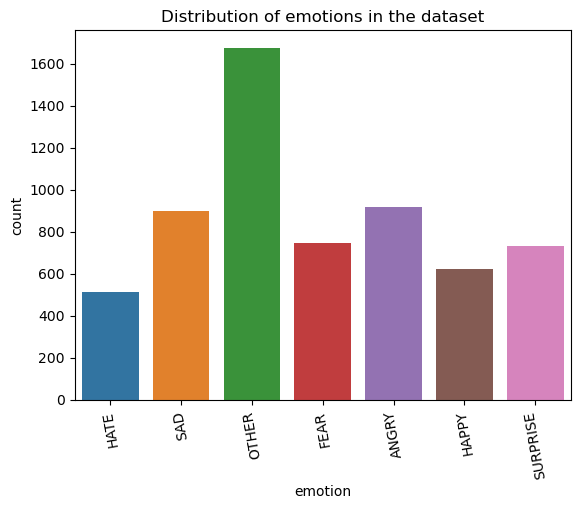

Imbalance Ratio: 3.25


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Distribution of emotions in the dataset
print(df3["emotion"].value_counts(normalize=True)* 100)


# Distribution of emotions in the dataset plot
sns.countplot(x=df3["emotion"])
plt.xticks(rotation=100)
plt.title("Distribution of emotions in the dataset")
plt.show()




# Calculate Imbalance Ratio
class_counts = df3["emotion"].value_counts()
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


In [9]:
from sklearn.preprocessing import LabelEncoder

# تبدیل لیبل‌ها به اعداد
le = LabelEncoder()
df3['emotion'] = le.fit_transform(df3['emotion'])

# نمایش نگاشت لیبل‌ها
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("نگاشت لیبل‌ها:", label_mapping)


نگاشت لیبل‌ها: {'ANGRY': 0, 'FEAR': 1, 'HAPPY': 2, 'HATE': 3, 'OTHER': 4, 'SAD': 5, 'SURPRISE': 6}


In [10]:
import re
def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # حذف لینک‌ها
    text = re.sub(r"@\S+", "", text)  # حذف منشن‌ها (@mentions)
    text = re.sub(r"#\S+", "", text)  # حذف هشتگ‌ها (#hashtags)
    text = re.sub(r"[^\w\s]", "", text)  # حذف علائم نگارشی
    text = re.sub(r"\s+", " ", text).strip()  # حذف فاصله‌های اضافی
    return text

df3['clean_text'] = df3['tweet'].apply(clean_text)


# i = df3.apply(lambda row: 1 if row['clean_text'] != row['tweet'] else 0, axis=1).sum()
# print(i)

In [11]:
# rows_to_remove = df3[df3['tweet'].str.match(r'^\s*(http|@|#).*$', case=False)]
# # چاپ سطر‌هایی که حذف می‌شوند
# print("سطر‌های حذف شده:")
# print(len(rows_to_remove))


# # Filter rows that only contain links, @ or #
# df3 = df3[~df3['tweet'].str.match(r'^\s*(http|@|#).*$', case=False)]



In [12]:
from hazm import Normalizer, WordTokenizer, stopwords_list, Lemmatizer
import random
import string

def preprocessing(text, Apply_normalizer= True, Aplly_wordtokenizer= True, remove_stop_words= True, Apply_lemmatizer=True, remove_numbers=True):
  '''
  Cleaning and preprocessing the given text.

  Args:
    text (str): the input text that we want to work on in.
    Apply_normalizer (bool): if True, shows that text will bee normalize by hazm. Defualt is True
    Aplly_wordtokenizer (bool): if True, the text will tokenize. Defualt is True
    remove_stop_words (list): a list that have the set of stopwords in pesian. Defualt is True
    Apply_lemmatizer (bool): change the word to its root. Defualt is True
    remove_numbers (bool): remove the numbers from text
    replace the \u200c:( text = "می‌خوانم کتابی از کتاب‌خانه و دانش‌آموزان را می‌بینم."
                        processed_text = ['می\u200cخوانم', 'کتابی', 'از', 'کتاب\u200cخانه', 'و', 'دانش\u200cآموزان', 'را', 'می\u200cبینم'])
    string.punctuation : removes this karakters (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)

  Return:
    filtered (list): list of words(of text) after cleaning and preprocessing.
  '''

  
  # Initinalize requiared tools from Hazm
  normalizer= Normalizer()
  wordtokenizer= WordTokenizer()
  stopword_lst= stopwords_list()
  lemmatizer = Lemmatizer()
  panctuation= string.punctuation +  "؟،؛.,#"
  


  # Step 1 : Normalize the text
  if Apply_normalizer:
    text= normalizer.normalize(text)


    
  # Step 2: Tokenize the text to words
  if Aplly_wordtokenizer:
    words= wordtokenizer.tokenize(text)



  # Step 3: delete the aditional numbers and words
  if remove_numbers:
    words = [word for word in words if not word.isdigit()]



  # step 4 : Delet the stop words from  words(list)
  if remove_stop_words:
    words= [word for word in words if word not in stopword_lst]



  # Step 5: delete the additionala (.?!,)
  if panctuation:
    words= [word for word in words if word not in panctuation]  



    
  #step 6: find the root of words
  if Apply_lemmatizer:
    words= [lemmatizer.lemmatize(word, pos= 'v') for word in words]


  #ُStep 7: replace the '\u200c'  
  filtered= [word.replace('\u200c', '')for word in words]

  return filtered




#  Kodun ne yaptığını görmek için 😊

if __name__ == "__main__":
    x= random.randint(1, 6000)
    sample_text = df3['clean_text'][x]
    processed_text = preprocessing(
        sample_text)
    print("Original Text:", sample_text)
    print("Processed Text:", processed_text)

Original Text: خداییش مردا یه چند ماه نرن استادیوم این اعتراض که دیگه ضرر جانی و مالی هم نداره راحت ترین اعتراضه اگه ملت این کار رو هم نکنن دیگه
Processed Text: ['خدا', 'مردا', 'یه', 'ماه', 'نرن', 'استادیوم', 'اعتراض', 'دیگه', 'ضرر', 'جانی', 'مالی', 'نداره', 'راحت', 'اعتراضه', 'اگه', 'ملت', 'کار', 'نکنن', 'دیگه']


In [13]:
# import pandas as pd
# from tqdm import tqdm
# import os
# from google.colab import files

# # مسیر ذخیره‌سازی موقت
# checkpoint_file = "checkpoint.csv"

# # اگر فایل موقت وجود دارد، داده‌ها را از آن بارگیری کنید
# if os.path.exists(checkpoint_file):
#     df3 = pd.read_csv(checkpoint_file)
# else:
#     # اگر فایل موقت وجود ندارد، از ابتدا شروع کنید
#     df3["clean_text2"] = pd.NA  # ستون جدید برای متن‌های پردازش‌شده

# # پردازش داده‌ها با ذخیره‌سازی موقت
# for i, row in tqdm(df3.iterrows(), total=len(df3)):
#     if pd.isna(row["clean_text2"]):  # اگر متن پردازش نشده است
#         df3.at[i, "clean_text2"] = preprocessing(row["clean_text"])  # پردازش متن
#         # پس از هر ۱۰۰ رکورد، داده‌ها را ذخیره کنید
#         if i % 100 == 0:
#             df3.to_csv(checkpoint_file, index=False)

#         if i % 1000 == 0 and i != 0:
#             df3.to_csv(checkpoint_file, index=False)
#             files.download(checkpoint_file)    

# # ذخیره نهایی پس از اتمام پردازش
# df3.to_csv(checkpoint_file, index=False)
# print("پردازش کامل شد و داده‌ها ذخیره شدند.")

In [14]:
# df3["clean_text"] = df3["clean_text"].apply(preprocessing)


In [15]:
df3= pd.read_csv('./checkpoint.csv')
df3

,tweet,emotion,clean_text,clean_text2
0,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,3,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,"['صدای', 'پرنده', 'دم', 'دما', 'صبح', 'متنفر',..."
1,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",5,کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ب...,"['کیفیت', 'خوبه', 'شک', 'خرید', 'واقعا', 'راض'..."
2,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,4,چون همش با دوربین ثبت شده ایا میشه اعتراض زد و...,"['همش', 'دوربین', 'ثبتشده', 'ایا', 'میشه', 'اع..."
3,اين وضع ب طرز خنده داري گريه داره ...,5,اين وضع ب طرز خنده داري گريه داره,"['وضع', 'ب', 'طرز', 'خنده', 'دار', 'گریه', 'دا..."
4,خب من رسما از یک نفر متنفرم،چون از گربه بدش می...,3,خب من رسما از یک نفر متنفرمچون از گربه بدش میا...,"['خب', 'رسما', 'نفر', 'متنفرمچون', 'گربه', 'بد..."
...,...,...,...,...
6061,مرحوم پیش بینی آبکی زیاد میکرد مرحوم عجب آ...,6,مرحوم پیش بینی آبکی زیاد میکرد مرحوم عجب آینده...,"['مرحوم', 'پیشبینی', 'آبکی', 'مرحوم', 'عجب', '..."
6062,کلا عین اعتقادات و توئیت زدناتون ... !! در ق...,0,کلا عین اعتقادات و توئیت زدناتون در قبال رانت ...,"['کلا', 'اعتقادات', 'توئیت', 'زدناتون', 'قبال'..."
6063,خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...,1,خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...,"['خب', 'میگ', 'بیاد', 'مارو', 'بگیره', 'یارو',..."
6064,همون هارو مگه آهنگ جدیدای خواننده‌های دهه ...,6,همون هارو مگه آهنگ جدیدای خوانندههای دهه پنجاه...,"['همون', 'هارو', 'مگه', 'آهنگ', 'جدیدای', 'خوا..."


In [16]:
# tandil be matn kardan token ha
import ast
df3['clean_text2'] = df3['clean_text2'].apply(lambda x: ' '.join(ast.literal_eval(x)) if x.startswith('[') else str(x))


In [17]:
df3

,tweet,emotion,clean_text,clean_text2
0,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,3,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,صدای پرنده دم دما صبح متنفر متنفر متنفر
1,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",5,کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم ب...,کیفیت خوبه شک خرید واقعا راض ماه استفادهمتأسفا...
2,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,4,چون همش با دوربین ثبت شده ایا میشه اعتراض زد و...,همش دوربین ثبتشده ایا میشه اعتراض زد اصن تاثیر...
3,اين وضع ب طرز خنده داري گريه داره ...,5,اين وضع ب طرز خنده داري گريه داره,وضع ب طرز خنده دار گریه داره
4,خب من رسما از یک نفر متنفرم،چون از گربه بدش می...,3,خب من رسما از یک نفر متنفرمچون از گربه بدش میا...,خب رسما نفر متنفرمچون گربه بد میاد صبح مخ رفتن...
...,...,...,...,...
6061,مرحوم پیش بینی آبکی زیاد میکرد مرحوم عجب آ...,6,مرحوم پیش بینی آبکی زیاد میکرد مرحوم عجب آینده...,مرحوم پیشبینی آبکی مرحوم عجب آیندهنگری پیشبینی
6062,کلا عین اعتقادات و توئیت زدناتون ... !! در ق...,0,کلا عین اعتقادات و توئیت زدناتون در قبال رانت ...,کلا اعتقادات توئیت زدناتون قبال رانت نون مفت س...
6063,خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...,1,خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...,خب میگ بیاد مارو بگیره یارو ترس میکنه یکم دوست...
6064,همون هارو مگه آهنگ جدیدای خواننده‌های دهه ...,6,همون هارو مگه آهنگ جدیدای خوانندههای دهه پنجاه...,همون هارو مگه آهنگ جدیدای خواننده پنجاه گوش میدید


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer()
X_Tfidf= tfidf.fit_transform(df3['clean_text2'])
print(X_Tfidf.shape)

# using Hold_out validation
X_train_val, X_test, y_train_val, y_test= train_test_split(X_Tfidf,df3['emotion'], test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val= train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

(6066, 18328)


In [19]:
# test models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


lr_model= LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)


y_val_pred= lr_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Train Accuracy: 0.8412780211285751
Logistic Regression Accuracy: 0.5128733264675592
              precision    recall  f1-score   support

           0       0.69      0.42      0.53       139
           1       0.74      0.62      0.67       118
           2       0.80      0.21      0.33        95
           3       0.90      0.62      0.74        85
           4       0.38      0.85      0.52       252
           5       0.51      0.19      0.28       163
           6       0.66      0.40      0.50       119

    accuracy                           0.51       971
   macro avg       0.67      0.47      0.51       971
weighted avg       0.61      0.51      0.50       971



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred= rf_model.predict(X_train)
train_acc= accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)


y_val_pred= rf_model.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Train Accuracy: 0.9976810100489565
Random Forest Accuracy: 0.5417095777548918
              precision    recall  f1-score   support

           0       0.67      0.42      0.51       139
           1       0.71      0.74      0.72       118
           2       0.60      0.39      0.47        95
           3       0.86      0.78      0.81        85
           4       0.44      0.69      0.54       252
           5       0.56      0.18      0.27       163
           6       0.43      0.62      0.51       119

    accuracy                           0.54       971
   macro avg       0.61      0.54      0.55       971
weighted avg       0.58      0.54      0.53       971



In [21]:
from sklearn.svm import SVC

svm_model= SVC(kernel='linear')
svm_model.fit(X_train,y_train)

y_train_pred= svm_model.predict(X_train)
train_acc= accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)

y_val_pred= svm_model.predict(X_val)

print("SVM Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Train Accuracy: 0.9394485957227519
SVM Accuracy: 0.533470648815654
              precision    recall  f1-score   support

           0       0.65      0.43      0.52       139
           1       0.74      0.68      0.71       118
           2       0.59      0.32      0.41        95
           3       0.81      0.73      0.77        85
           4       0.40      0.79      0.53       252
           5       0.49      0.21      0.29       163
           6       0.66      0.45      0.54       119

    accuracy                           0.53       971
   macro avg       0.62      0.51      0.54       971
weighted avg       0.58      0.53      0.52       971



In [22]:
from sklearn.naive_bayes import MultinomialNB

# مدل Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_train_pred= nb_model.predict(X_train)
train_acc= accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)

# پیش‌بینی بر روی داده‌های اعتبارسنجی
y_val_pred = nb_model.predict(X_val)

# ارزیابی مدل
print("Naive Bayes Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Train Accuracy: 0.6276732800824529
Naive Bayes Accuracy: 0.3728115345005149
              precision    recall  f1-score   support

           0       0.64      0.25      0.36       139
           1       0.93      0.35      0.51       118
           2       1.00      0.07      0.14        95
           3       1.00      0.09      0.17        85
           4       0.30      0.98      0.46       252
           5       0.56      0.06      0.11       163
           6       0.83      0.13      0.22       119

    accuracy                           0.37       971
   macro avg       0.75      0.28      0.28       971
weighted avg       0.66      0.37      0.31       971



In [23]:
from xgboost import XGBClassifier

# مدل XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_train_pred= xgb_model.predict(X_train)
train_acc= accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)

# پیش‌بینی بر روی داده‌های اعتبارسنجی
y_val_pred = xgb_model.predict(X_val)

# ارزیابی مدل
print("XGBoost Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Train Accuracy: 0.8497809842824015
XGBoost Accuracy: 0.5736354273944387
              precision    recall  f1-score   support

           0       0.63      0.49      0.55       139
           1       0.73      0.77      0.75       118
           2       0.66      0.35      0.46        95
           3       0.83      0.79      0.81        85
           4       0.46      0.73      0.57       252
           5       0.50      0.35      0.41       163
           6       0.59      0.47      0.52       119

    accuracy                           0.57       971
   macro avg       0.63      0.56      0.58       971
weighted avg       0.59      0.57      0.57       971



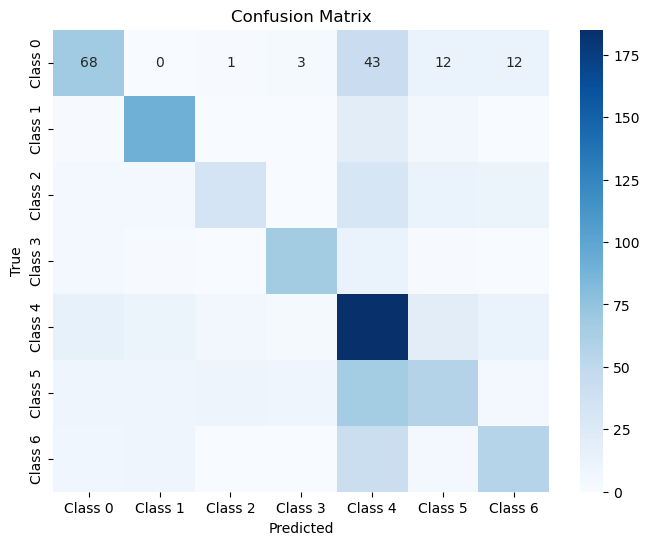

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# نمایش ماتریس سردرگمی (Confusion Matrix)
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [25]:
# پیش‌بینی نهایی روی داده‌های تست
y_test_pred = xgb_model.predict(X_test)

# ارزیابی نهایی مدل
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.5757825370675453
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       171
           1       0.70      0.79      0.74       126
           2       0.61      0.42      0.50       120
           3       0.88      0.73      0.80       108
           4       0.48      0.75      0.58       359
           5       0.51      0.25      0.34       196
           6       0.60      0.48      0.53       134

    accuracy                           0.58      1214
   macro avg       0.63      0.56      0.58      1214
weighted avg       0.59      0.58      0.56      1214



In [26]:
# فرض می‌کنیم که 'tfidf' مدل TF-IDF از قبل فیت شده و 'xgb_model' مدل XGBoost است

# ابتدا متن جدید رو به وکتور ویژگی تبدیل کن
input_text =["متنفرم"]  # باید داخل لیست قرار بدی
input_vector = tfidf.transform(input_text)

# پیش‌بینی مدل XGBoost با استفاده از وکتور ویژگی
f = xgb_model.predict(input_vector)

print(f)


[4]


In [27]:
import torch
from transformers import AutoTokenizer, AutoModel
from hazm import Normalizer
import numpy as np

# لود مدل ParsBERT
model_name = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# نرمالایزر برای متن فارسی
normalizer = Normalizer()

# تبدیل متن‌ها به بردارهای ParsBERT
def get_embeddings(text):
    normalized_text = normalizer.normalize(text)
    inputs = tokenizer(normalized_text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    # گرفتن embedding از لایه [CLS]
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()
    return embeddings

# تبدیل تمام متن‌های دیتاست به بردار
X_bert = np.vstack([get_embeddings(text) for text in df3['tweet']])


In [44]:
X_bert.shape

(6066, 768)

In [35]:
# تقسیم داده‌ها به 80% train_val و 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_bert, df3['emotion'], test_size=0.2, random_state=42)

# تقسیم داده‌های train_val به 80% train و 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)



In [36]:
# test models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


lr_model= LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)


y_val_pred= lr_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Train Accuracy: 0.9144550373615048
Logistic Regression Accuracy: 0.5087538619979403
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       139
           1       0.60      0.63      0.61       118
           2       0.44      0.44      0.44        95
           3       0.55      0.60      0.58        85
           4       0.50      0.51      0.50       252
           5       0.47      0.38      0.42       163
           6       0.48      0.48      0.48       119

    accuracy                           0.51       971
   macro avg       0.51      0.52      0.51       971
weighted avg       0.51      0.51      0.51       971



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred= rf_model.predict(X_train)
train_acc= accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)


y_val_pred= rf_model.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Train Accuracy: 0.999742334449884
Random Forest Accuracy: 0.4593202883625129
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       139
           1       0.56      0.47      0.51       118
           2       0.62      0.34      0.44        95
           3       0.71      0.18      0.28        85
           4       0.38      0.81      0.52       252
           5       0.58      0.19      0.29       163
           6       0.53      0.32      0.40       119

    accuracy                           0.46       971
   macro avg       0.56      0.40      0.42       971
weighted avg       0.52      0.46      0.43       971



In [38]:
from sklearn.svm import SVC

svm_model= SVC(kernel='linear')
svm_model.fit(X_train,y_train)

y_train_pred= svm_model.predict(X_train)
train_acc= accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)

y_val_pred= svm_model.predict(X_val)

print("SVM Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Train Accuracy: 0.9938160267972173
SVM Accuracy: 0.486096807415036
              precision    recall  f1-score   support

           0       0.47      0.60      0.53       139
           1       0.53      0.68      0.60       118
           2       0.42      0.54      0.47        95
           3       0.58      0.58      0.58        85
           4       0.51      0.48      0.49       252
           5       0.41      0.28      0.33       163
           6       0.49      0.34      0.40       119

    accuracy                           0.49       971
   macro avg       0.49      0.50      0.49       971
weighted avg       0.48      0.49      0.48       971



In [40]:
from sklearn.naive_bayes import MultinomialNB

# مدل Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_train_pred= nb_model.predict(X_train)
train_acc= accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)

# پیش‌بینی بر روی داده‌های اعتبارسنجی
y_val_pred = nb_model.predict(X_val)

# ارزیابی مدل
print("Naive Bayes Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [41]:
from xgboost import XGBClassifier

# مدل XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_train_pred= xgb_model.predict(X_train)
train_acc= accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_acc)

# پیش‌بینی بر روی داده‌های اعتبارسنجی
y_val_pred = xgb_model.predict(X_val)

# ارزیابی مدل
print("XGBoost Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Train Accuracy: 0.999742334449884
XGBoost Accuracy: 0.5427394438722966
              precision    recall  f1-score   support

           0       0.56      0.57      0.57       139
           1       0.59      0.58      0.59       118
           2       0.59      0.49      0.54        95
           3       0.62      0.39      0.48        85
           4       0.49      0.72      0.58       252
           5       0.59      0.37      0.45       163
           6       0.53      0.49      0.51       119

    accuracy                           0.54       971
   macro avg       0.57      0.52      0.53       971
weighted avg       0.56      0.54      0.54       971



In [28]:
df4 = pd.read_excel('./train_fa2.xlsx')
df4['SAD'].value_counts()

SAD
HAPPY    1462
OTHER    1263
ANGRY    1012
SAD       844
FEAR      342
Name: count, dtype: int64

In [29]:
df4

,کی گفته مرد گریه نمیکنه!؟!؟ سیلم امشب سیل #اصفهان,SAD
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر میشد,SAD
...,...,...
4918,من از بو و ماندگاریش راضی بودم ، قیمتش هم‌ مناسبه,HAPPY
4919,گاز نداریم آب نداریم برق نداریم نت نداریم پول ...,SAD
4920,یکی بهم گفت برنو چرا عاشق نمیشی گفتم ما پول عا...,SAD
4921,زیادی داریم به قضیه ی گاز میپردازیم فقط فراخوا...,OTHER


In [30]:
import random
i= random.randint(0, 4923)
print(df4.loc[i, 'کی گفته مرد گریه نمیکنه!؟!؟ سیلم امشب سیل #اصفهان'])
print(df4.loc[i, 'SAD'])

۹۷ روز از بازداشت #آرش_صادقی گذشت! #مهسا_امینی 
SAD


حله، حالا که دیتا رو پیدا کردی، بریم مرحله به مرحله ببینیم چیکار باید بکنی. جوری توضیح میدم که انگار داری یه بازی مرحله‌ای انجام میدی و هر مرحله رو باید درست رد کنی تا بری بعدی.  

---

## 🚀 **مرحله ۱: بررسی اولیه دیتاست** (مثل نگاه کردن به نقشه قبل از شروع بازی)  
قبل از اینکه هر کاری بکنی، باید یه نگاه کلی به دیتاستت بندازی. این کار کمک می‌کنه که بفهمی:  
- **چند تا داده داری؟** (خب گفتی ۱۳,۰۰۰ تا، اوکی)  
- **ستون‌های دیتاست چی هستن؟** (مثلاً، ستون متن توییت، ستون برچسب احساسات و ...)  
- **مقدار داده‌ها در هر کلاس احساسات چطوره؟** (مثلاً، نکنه ۹۰٪ توییت‌ها "خوشحال" باشن و فقط ۱۰٪ بقیه؟ این باعث عدم تعادل میشه)  

📌 **کد پیشنهادی برای بررسی اولیه:**  
```python
import pandas as pd  

df = pd.read_csv("your_dataset.csv")  # اینو با اسم فایلت عوض کن
print(df.head())  # نمایش ۵ سطر اول
print(df.info())  # نمایش اطلاعات کلی درباره دیتاست
print(df['label'].value_counts())  # بررسی توزیع برچسب‌ها
```
✍ **اگر توزیع داده‌ها نامتعادل بود، باید روش‌هایی مثل oversampling یا undersampling رو انجام بدی (بعداً بهش می‌رسیم).**  

📌 **منبع پیشنهادی برای بررسی اولیه دیتاست:**  
[راهنمای بررسی اولیه دیتا در پانداس](https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184)  

---

## 🔍 **مرحله ۲: پاکسازی داده‌ها (Data Cleaning)** (مثل تمیز کردن صفحه بازی قبل از شروع)  
باید مطمئن بشی که دیتای خامت مشکل خاصی نداره. مشکلات رایج اینا هستن:  
✅ **مقادیر خالی (Missing Values)**  
✅ **داده‌های تکراری (Duplicate Data)**  
✅ **توییت‌های بی‌معنی (مثلاً شامل فقط @ و # و لینک‌ها بدون متن مفید)**  

📌 **کد پیشنهادی برای پاکسازی:**  
```python
# حذف مقادیر خالی
df = df.dropna()

# حذف مقادیر تکراری
df = df.drop_duplicates()

# بررسی نمونه‌هایی که فقط شامل لینک و منشن هستن
import re
df = df[~df['text'].str.match(r'^\s*(http|@|#).*$', case=False)]
```
📌 **منبع پیشنهادی:**  
[آموزش Data Cleaning در پانداس](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4)  

---

## 🛠 **مرحله ۳: پیش‌پردازش متن (Text Preprocessing)** (مثل تنظیمات اولیه کاراکتر توی بازی)  
الان باید متن‌های توییت رو برای مدل آماده کنیم. توییت‌ها معمولاً کثیف هستن و پر از چیزهای اضافی مثل:  
❌ لینک‌ها (https://...)  
❌ نام‌های کاربری (@user)  
❌ هشتگ‌ها (#موضوع)  
❌ ایموجی‌ها (😂😡❤️)  
❌ حروف اضافی کشیده ("عاااالیییی")  

📌 **کد پیشنهادی برای تمیز کردن متن:**  
```python
import re  

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)  # حذف لینک‌ها
    text = re.sub(r"@\S+", "", text)  # حذف منشن‌ها
    text = re.sub(r"#\S+", "", text)  # حذف هشتگ‌ها
    text = re.sub(r"[^\w\s]", "", text)  # حذف علائم نگارشی
    text = re.sub(r"\s+", " ", text).strip()  # حذف فاصله‌های اضافی
    return text

df["clean_text"] = df["text"].apply(clean_text)
```

📌 **منبع پیشنهادی:**  
[راهنمای پیش‌پردازش متن](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python/)  

---

## 📊 **مرحله ۴: تحلیل داده‌ها (Exploratory Data Analysis - EDA)** (مثل بررسی ویژگی‌های بازی قبل از شروع)  
باید یه کم روی دیتات آنالیز انجام بدی که بفهمی:  
- **کدوم کلمات بیشتر استفاده شدن؟**  
- **طول جملات چقدره؟**  
- **احساسات چقدر توزیع شدن؟**  

📌 **کد پیشنهادی برای بررسی کلمات پر تکرار:**  
```python
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = " ".join(df["clean_text"])
word_freq = Counter(all_words.split())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
```
📌 **منبع پیشنهادی:**  
[EDA در NLP](https://towardsdatascience.com/exploratory-data-analysis-eda-for-text-data-b8a26c6a00e7)  

---

## 🔢 **مرحله ۵: تبدیل متن به عدد (Tokenization & Embedding)** (مثل آماده کردن کاراکترهای بازی برای حرکت)  
مدل‌های یادگیری ماشین فقط عدد می‌فهمن، پس باید متن رو به عدد تبدیل کنیم. روش‌های مختلفی وجود داره:  
- **Bag of Words (BoW)** – مدل ساده‌ای که فقط تعداد کلمات رو می‌شمره  
- **TF-IDF** – مقدار اهمیت هر کلمه در متن  
- **Word Embeddings (مثل Word2Vec یا BERT)** – تبدیل کلمات به بردار عددی  

📌 **اگر از BERT استفاده کنی:**  
```python
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
tokens = tokenizer(df["clean_text"].tolist(), padding=True, truncation=True, return_tensors="pt")
```
📌 **منبع پیشنهادی:**  
[مقدمه‌ای بر Tokenization](https://towardsdatascience.com/tokenization-for-natural-language-processing-a179a891bad4)  

---

## 🏗 **مرحله ۶: مدل‌سازی (Training a Model)** (مثل ساختن شخصیت بازی)  
باید تصمیم بگیری که از چه مدلی استفاده کنی:  
✅ **مدل‌های ساده (مثل Naive Bayes, SVM)** – اگر دیتاست کوچیک باشه  
✅ **مدل‌های پیچیده‌تر (مثل LSTM, BERT)** – اگر دیتاست بزرگ باشه و دقت بالا بخوای  

📌 **اگر از مدل ساده استفاده کنی:**  
```python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer()
model = MultinomialNB()

pipeline = Pipeline([
    ("vectorizer", vectorizer),
    ("classifier", model)
])

pipeline.fit(df["clean_text"], df["label"])
```
📌 **اگر از BERT استفاده کنی:**  
[راهنمای آموزش مدل BERT برای تحلیل احساسات](https://huggingface.co/docs/transformers/training)  

---

## ✅ **مرحله ۷: ارزیابی مدل (Evaluation & Testing)** (مثل بررسی امتیاز بازی)  
بعد از آموزش مدل، باید ببینی چقدر خوب کار میکنه. از معیارهای **دقت (Accuracy)، دقت مثبت (Precision)، یادآوری (Recall)** استفاده کن.  

📌 **کد ارزیابی مدل:**  
```python
from sklearn.metrics import classification_report

y_pred = pipeline.predict(df_test["clean_text"])
print(classification_report(df_test["label"], y_pred))
```
📌 **منبع پیشنهادی:**  
[راهنمای ارزیابی مدل‌های NLP](https://towardsdatascience.com/evaluation-metrics-for-text-classification-1b215e31d685)  

---

### **حالا تو بگو، تو کدوم مرحله سوال داری؟** 😎

In [31]:
import random

# فرض می‌کنیم که احساسات شاد با "happy" یا "joyful" مشخص می‌شن
happy_tweets = df[df['emotion'].isin(['joy'])]

# انتخاب یک ردیف تصادفی از داده‌های شاد
i = random.randint(0, len(happy_tweets) - 1)
print(happy_tweets.iloc[i]['tweet'])
print(happy_tweets.iloc[i]['emotion'])




# i= random.randint(0, 113829)
# print(df.loc[i, 'tweet'])
# print(df.loc[i, 'emotion'])

چه زیبا شد آیت الله رئیسی
 خادم امام هشتم
در هشتمین روز دهه کرامت
هشتمین رئیس جمهور ایران شد.
#جشن_ملت_ایران
joy


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113829 entries, 0 to 113828
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   tweet         113829 non-null  object
 1   replyCount    113829 non-null  int64 
 2   retweetCount  113829 non-null  int64 
 3   likeCount     113829 non-null  int64 
 4   quoteCount    113829 non-null  int64 
 5   hashtags      113829 non-null  object
 6   sourceLabel   113829 non-null  object
 7   emotion       113829 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.9+ MB


In [33]:
# Check the number of labels
print(df['emotion'].value_counts())

print(df['emotion'].value_counts(normalize=True) * 100)


emotion
sad         34328
joy         28024
anger       20069
fear        17624
surprise    12859
disgust       925
Name: count, dtype: int64
emotion
sad         30.157517
joy         24.619385
anger       17.630832
fear        15.482873
surprise    11.296770
disgust      0.812622
Name: proportion, dtype: float64


In [34]:
# Drop the Repetitive Rows
#df= df.drop_duplicates()